# Rolling_avg with pandas
@Bragatte [Ref](https://www.youtube.com/watch?v=rrVgT6Q8CMM)actoring

In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
data = yf.download('^GSPC', start='2016-11-01', end='2021-11-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
def crossover_sinal(data):
    #criar sinais de compra e venda
    data['SMA15'] = data['Close'].rolling(window=15).mean() #média móvel
    data['SMA50'] = data['Close'].rolling(window=50).mean() #média móvel

    data['Anterior'] = data['SMA15'].shift(1) - data['SMA50'].shift(1)
    data['Atual'] = data['SMA15'] - data['SMA50']

    data.loc[(data['Anterior'] < 0) & (data['Atual'] > 0), 'Compra'] = data['Close']
    data.loc[(data['Anterior'] > 0) & (data['Atual'] < 0), 'Venda'] = data['Close']

    columns = ['Close','SMA15','SMA50','Compra','Venda']

    return data[columns]

In [6]:
output_df = crossover_sinal(data)
output_df.tail()

,Close,SMA15,SMA50,Compra,Venda
Date,,,,,
2021-10-25,4566.479980,4445.938574,4447.426162,NaN,NaN
2021-10-26,4574.790039,4461.209896,4449.327764,4574.790039,NaN
2021-10-27,4551.680176,4473.751921,4451.399766,NaN,NaN
2021-10-28,4596.419922,4486.862598,4455.322764,NaN,NaN
2021-10-29,4605.379883,4501.131934,4459.314365,NaN,NaN


In [7]:
filtered_data = output_df.loc[(output_df.index<'2020-01-01') & (output_df.index>'2019-01-01')]

Text(0, 0.5, 'Data')

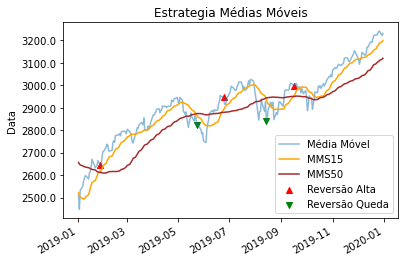

In [9]:
fig, ax = plt.subplots()

#Adicionar info
ax.plot(filtered_data.index, filtered_data['Close'], label='Média Móvel', alpha=0.5)
ax.plot(filtered_data.index, filtered_data['SMA15'], label='MMS15',color='orange')
ax.plot(filtered_data.index, filtered_data['SMA50'], label='MMS50',color='brown')

#Adicionar linhas de compra e venda
ax.scatter(filtered_data.index, filtered_data['Compra'], label='Reversão Alta', marker='^',color='red')
ax.scatter(filtered_data.index, filtered_data['Venda'], label='Reversão Queda', marker='v',color='green')

#formatar
fig.autofmt_xdate()
ax.legend()

#label adicionais
ax.yaxis.set_major_formatter('{x:}')
ax.set_title('Estrategia Médias Móveis')
ax.set_ylabel('Data')

[Ref1](https://www.ti-enxame.com/pt/python/media-movel-pandas/827849410/)